In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

In [222]:
pd.set_option('display.max_columns', None)

In [223]:
test = pd.read_csv("./train/train.csv")
train = pd.read_csv("./train/test.csv")

In [224]:
train.head(100)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,1.415894e+04,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8.395112e+03,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1.572272e+03,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2.740179e+03,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8.561499e+03,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0.000011,udp,-,INT,2,0,604,0,90909.090200,254,0,2.196364e+08,0.000000,0,0,0.011000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,302,0,0,0,43,2,2,2,1,40,0,0,0,2,39,0,Normal,0
96,97,0.000010,udp,-,INT,2,0,552,0,100000.002500,254,0,2.208000e+08,0.000000,0,0,0.010000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,276,0,0,0,43,2,2,2,1,40,0,0,0,2,39,0,Normal,0
97,98,37.578835,tcp,-,FIN,22,24,1920,4312,1.197483,31,29,3.902197e+02,879.856995,6,6,1789.451280,1633.831446,207537.671100,199563.413100,255,3446481727,3446826646,255,0.000852,0.000682,0.000170,87,180,0,0,6,0,10,1,1,2,0,0,0,3,7,0,Normal,0
98,99,0.000011,udp,-,INT,2,0,1754,0,90909.090200,254,0,6.378182e+08,0.000000,0,0,0.011000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,877,0,0,0,63,2,8,8,1,63,0,0,0,8,62,0,Normal,0


In [225]:
train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0


In [226]:
train.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,175341.000000,175341.000000,1.753410e+05,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,175341.000000,175341.000000,1.753410e+05,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,87671.000000,1.359389,20.298664,18.969591,8.844844e+03,1.492892e+04,9.540619e+04,179.546997,79.609567,7.345403e+07,6.712056e+05,4.953000,6.948010,985.976864,88.216296,4.976254e+03,604.353826,116.257339,9.692504e+08,9.688770e+08,115.013625,0.041396,0.021020,0.020375,136.751769,124.173382,0.105982,2.144292e+03,9.306437,1.304179,6.193936,5.383538,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752,0.680622
std,50616.731112,6.480249,136.887597,110.258271,1.747656e+05,1.436542e+05,1.654010e+05,102.940011,110.506863,1.883574e+08,2.421312e+06,66.005059,52.732999,7242.245841,987.093195,4.496585e+04,4061.043281,127.001024,1.355264e+09,1.354000e+09,126.886530,0.079354,0.043400,0.040506,204.677360,258.317056,0.776911,5.420797e+04,10.704331,0.954406,8.052476,8.047104,5.783585,10.956186,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516,0.466237
min,1.000000,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,43836.000000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.278614e+01,62.000000,0.000000,1.305334e+04,0.000000e+00,0.000000,0.000000,0.008000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000e+00,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,87671.000000,0.001582,2.000000,2.000000,4.300000e+02,1.640000e+02,3.225807e+03,254.000000,29.000000,8.796748e+05,1.447023e+03,0.000000,0.000000,0.279733,0.006000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,73.000000,44.000000,0.000000,0.000000e+00,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,131506.000000,0.668069,12.000000,10.000000,1.418000e+03,1.102000e+03,1.250000e+05,254.000000,252.000000,8.888889e+07,2.784487e+04,3.000000,2.000000,55.156896,51.053000,2.513295e+03,114.990625,255.000000,1.916651e+09,1.913675e+09,255.000000,0.065481,0.023268,0.038906,100.000000,89.000000,0.000000,0.000000e+00,12.000000,2.000000,7.000000,5.000000,3.000000,12.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,1.000000
max,175341.000000,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,2.242273e+07,4803.000000,5484.000000,84371.496000,56716.824000,1.460480e+06,289388.269700,255.000000,4.294959e+09,4.294882e+09,255.000000,2.518893,2.100352,1.520884,1504.000000,1458.000000,172.000000,6.558056e+06,63.000000,6.000000,51.000000,51.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


In [227]:

train.astype(bool).sum(axis=0)

id                   175341
dur                  172684
proto                175341
service              175341
state                175341
spkts                175341
dpkts                 91059
sbytes               175341
dbytes                91059
rate                 172372
sttl                 172179
dttl                  90969
sload                172364
dload                 91051
sloss                 79893
dloss                 78704
sinpkt               174740
dinpkt                91048
sjit                  86847
djit                  81598
swin                  79946
stcpb                 79095
dtcpb                 79089
dwin                  79088
tcprtt                79041
synack                79041
ackdat                79040
smean                175341
dmean                 91059
trans_depth           17840
response_body_len     11294
ct_srv_src           175341
ct_state_ttl         134550
ct_dst_ltm           175341
ct_src_dport_ltm     175341
ct_dst_sport_ltm    

In [228]:
train.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [229]:
print(train['is_sm_ips_ports'].value_counts())
print(train['label'].value_counts())
print(train['ct_flw_http_mthd'].value_counts())



0    172579
1      2762
Name: is_sm_ips_ports, dtype: int64
1    119341
0     56000
Name: label, dtype: int64
0     157501
1      16696
4        846
9         90
2         74
6         36
30        30
25        25
12        24
16        16
3          3
Name: ct_flw_http_mthd, dtype: int64


In [230]:
train['attack_cat'].value_counts()

Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: attack_cat, dtype: int64

In [231]:
query1 = train[(train.attack_cat=="Normal")]
print(query1['ct_flw_http_mthd'].value_counts())

query2 = train[(train.attack_cat=="Generic")]
print(query2['ct_flw_http_mthd'].value_counts())

query3 = train[(train.attack_cat=="Exploits")]
print(query3['ct_flw_http_mthd'].value_counts())

query4 = train[(train.attack_cat=="Fuzzers")]
print(query4['ct_flw_http_mthd'].value_counts())

query5 = train[(train.attack_cat=="DoS")]
print(query5['ct_flw_http_mthd'].value_counts())

query6 = train[(train.attack_cat=="Reconnaissance")]
print(query6['ct_flw_http_mthd'].value_counts())

query7 = train[(train.attack_cat=="Analysis")]
print(query7['ct_flw_http_mthd'].value_counts())

query8 = train[(train.attack_cat=="Backdoor")]
print(query8['ct_flw_http_mthd'].value_counts())

query9 = train[(train.attack_cat=="Shellcode")]
print(query9['ct_flw_http_mthd'].value_counts())

query10 = train[(train.attack_cat=="Worms")]
print(query10['ct_flw_http_mthd'].value_counts())



0     50820
1      4810
4       300
9        36
2        16
12       12
6         6
Name: ct_flw_http_mthd, dtype: int64
0    39706
1      282
4        8
2        4
Name: ct_flw_http_mthd, dtype: int64
0    25384
1     7788
4      206
2       12
3        3
Name: ct_flw_http_mthd, dtype: int64
0    17176
1      878
4      100
2       24
6        6
Name: ct_flw_http_mthd, dtype: int64
0    11120
1     1090
4       36
2       12
6        6
Name: ct_flw_http_mthd, dtype: int64
0    9022
1    1425
4      36
6       6
2       2
Name: ct_flw_http_mthd, dtype: int64
0     1443
1      262
4      144
9       54
30      30
25      25
16      16
12      12
6       12
2        2
Name: ct_flw_http_mthd, dtype: int64
0    1670
1      68
4       8
Name: ct_flw_http_mthd, dtype: int64
0    1133
Name: ct_flw_http_mthd, dtype: int64
1    93
0    27
4     8
2     2
Name: ct_flw_http_mthd, dtype: int64


In [232]:
train.isnull().sum(axis=0)

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [233]:
train_fil = train[(train['attack_cat']=='Normal') | (train['attack_cat']=='Generic ') |
            (train['attack_cat']=='Exploits') | (train['attack_cat']=='Fuzzers') |
            (train['attack_cat']=='DoS') | (train['attack_cat']=='Reconnaissance') ]

print(train_fil['attack_cat'].value_counts())


Normal            56000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Name: attack_cat, dtype: int64


In [234]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

train_fil['attacks'] = labelencoder.fit_transform(train_fil['attack_cat'])
train_fil['attacks'].value_counts()

          

/home/nikhil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


3    56000
1    33393
2    18184
0    12264
4    10491
Name: attacks, dtype: int64

In [166]:
train_fil.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label', 'attacks'],
      dtype='object')

In [236]:

train_X = train_fil[(train['attack_cat']=='Normal') | (train_fil['attack_cat']=='Generic ') |   
           (train_fil['attack_cat']=='Exploits') | (train_fil['attack_cat']=='Fuzzers') |
           (train_fil['attack_cat']=='DoS') | (train_fil['attack_cat']=='Reconnaissance') ]
print(train_X['attack_cat'].value_counts())
train_X = train_X.drop(columns='attack_cat')
train_X.head()

Normal            56000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Name: attack_cat, dtype: int64


/home/nikhil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label,attacks
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,0,3
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,0,3
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,0,3
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,0,3
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,0,3


In [237]:
train_Y = train_X['attacks']
train_Y

0         3
1         3
2         3
3         3
4         3
         ..
175248    0
175267    1
175277    1
175299    1
175305    1
Name: attacks, Length: 130332, dtype: int64

In [238]:
train_X.drop(columns="attacks")

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,1.415894e+04,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8.395112e+03,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1.572272e+03,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2.740179e+03,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8.561499e+03,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175248,175249,2.013791,tcp,smtp,FIN,226,50,272070,3084,136.558356,62,252,1.076048e+06,12009.190430,110,8,8.990138,40.210039,927.685598,48.421094,255,2033367916,297297964,255,0.051247,0.011363,0.039884,1204,62,0,0,1,1,1,1,1,1,0,0,0,18,1,0,1
175267,175268,1.914309,tcp,smtp,FIN,74,30,69997,2132,53.805315,62,252,2.885720e+05,8613.029297,33,8,26.213891,65.074277,2412.352478,90.773586,255,556303757,246088519,255,0.039137,0.027147,0.011990,946,71,0,0,1,1,1,1,1,1,0,0,0,18,1,0,1
175277,175278,3.719110,tcp,-,FIN,66,340,3086,426483,108.897021,62,252,6.539199e+03,914689.812500,6,167,57.217077,10.914012,3358.369752,1585.622696,255,3046870123,1723342386,255,0.060793,0.025596,0.035197,47,1254,0,0,1,1,1,1,1,1,0,0,0,2,1,0,1
175299,175300,0.996503,tcp,pop3,FIN,20,30,942,16684,49.171955,62,252,7.185126e+03,129476.781300,7,13,52.447526,33.937380,3005.256004,2479.497222,255,5604755,575257391,255,0.044995,0.007366,0.037629,47,556,0,0,1,1,1,1,1,1,0,0,0,7,1,0,1


In [239]:
test_fil = test[(test['attack_cat']=='Normal') | (test['attack_cat']=='Generic ') |   
            (test['attack_cat']=='Exploits') | (test['attack_cat']=='Fuzzers') |
            (test['attack_cat']=='DoS') | (test['attack_cat']=='Reconnaissance') ]
print(test_fil['attack_cat'].value_counts())

#

Normal            37000
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Name: attack_cat, dtype: int64


In [240]:
test_fil['attack_cat'].value_counts()

Normal            37000
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Name: attack_cat, dtype: int64

In [241]:
labelencoder = LabelEncoder()

test_fil['attacks'] = labelencoder.fit_transform(test_fil['attack_cat'])
test_fil['attacks'].value_counts()


/home/nikhil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


3    37000
1    11132
2     6062
0     4089
4     3496
Name: attacks, dtype: int64

In [242]:
test_Y = test_fil['attacks']

In [243]:
test_X = test_fil.drop(columns='attack_cat')

In [244]:
test_X.drop(columns="attacks")

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,254,0,1.803636e+08,0.000000,0,0,0.011000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,254,0,8.810000e+08,0.000000,0,0,0.008000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,254,0,8.544000e+08,0.000000,0,0,0.005000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,254,0,6.000000e+08,0.000000,0,0,0.006000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,254,0,8.504000e+08,0.000000,0,0,0.010000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,254,0,8.320000e+07,0.000000,0,0,0.005000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,52,0,0,0,1,2,2,1,1,2,0,0,0,2,1,0,0
82328,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,254,252,1.241044e+05,2242.109863,7,1,55.880051,143.7,4798.130981,190.980813,255,1072535109,3284291478,255,0.173208,0.100191,0.073017,903,44,0,0,1,1,2,1,1,1,0,0,0,3,2,0,0
82329,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,0,0,60000.720000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,1,0
82330,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,0,0,60000.732000,0.0,10.954518,0.000000,0,0,0,0,0.000000,0.000000,0.000000,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,1,0


In [36]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc_df = pd.DataFrame(enc.fit_transform(train_X[['proto']]).toarray())

In [37]:
enc_df1 = pd.DataFrame(enc.fit_transform(train_X[['state']]).toarray())

In [43]:
train_X 


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label,attacks,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,1.415894e+04,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8.395112e+03,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1.572272e+03,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2.740179e+03,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8.561499e+03,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0

In [245]:
labelencoder = LabelEncoder()

train_X['protos'] = labelencoder.fit_transform(train_X['proto'])
print(train_X['protos'].value_counts())
train_X['states'] = labelencoder.fit_transform(train_X['state'])



113    77952
119    23435
120    10680
6       2859
78      2351
       ...  
107       89
44        89
42        18
37        15
91         1
Name: protos, Length: 133, dtype: int64


In [246]:
labelencoder = LabelEncoder()

test_X['protos'] = labelencoder.fit_transform(test_X['proto'])
print(train_X['protos'].value_counts())
test_X['states'] = labelencoder.fit_transform(test_X['state'])
test_X['states'].value_counts()

113    77952
119    23435
120    10680
6       2859
78      2351
       ...  
107       89
44        89
42        18
37        15
91         1
Name: protos, Length: 133, dtype: int64


3    38483
4    14506
2     6947
5     1837
0        4
6        1
1        1
Name: states, dtype: int64

In [247]:
train_X = train_X.drop(columns="state")
train_X = train_X.drop(columns="proto")
train_X=train_X.drop(columns="attacks")
train_X=train_X.drop(columns="service")
train_X=train_X.drop(columns="id")
train_X=train_X.drop(columns="label")

In [248]:
test_X = test_X.drop(columns="state")
test_X = test_X.drop(columns="proto")
test_X=test_X.drop(columns="service")
test_X=test_X.drop(columns="id")

In [253]:
train_X = train_X[['dur','sbytes','dbytes','sinpkt','tcprtt',
                    'sload','dload','dpkts','ct_srv_src','ct_srv_dst']] 

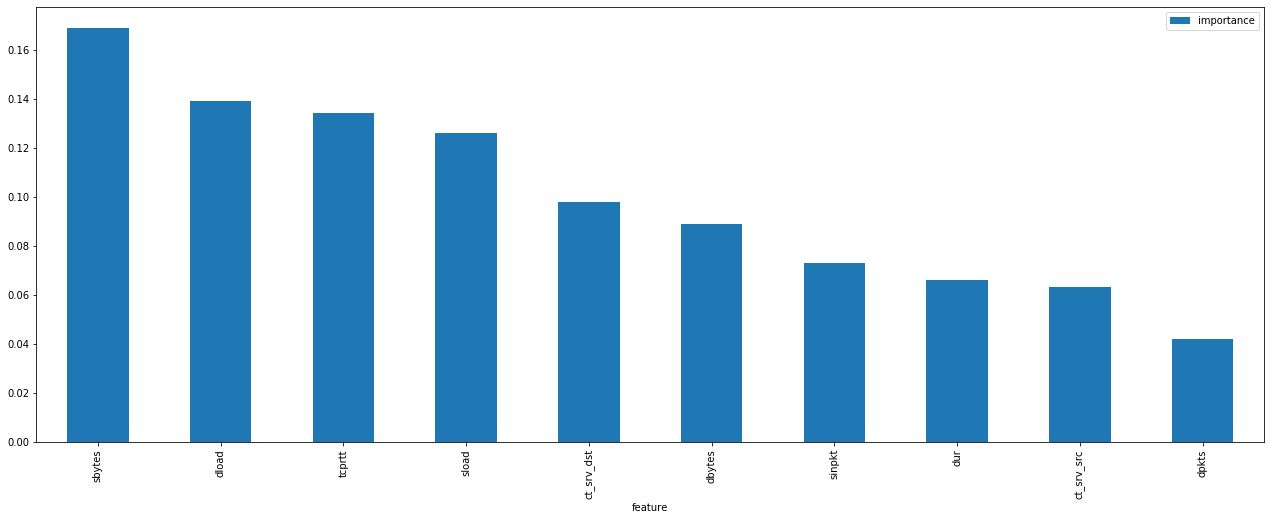

In [254]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();


rfc.fit(train_X, 
        train_Y);

score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':train_X.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (22, 8)
importances.plot.bar();

In [190]:

train_X=train_X.drop(columns="is_ftp_login")
train_X=train_X.drop(columns="ct_ftp_cmd")
train_X=train_X.drop(columns="dwin")

##

test_X=test_X.drop(columns="is_ftp_login")
test_X=test_X.drop(columns="ct_ftp_cmd")
test_X=test_X.drop(columns="dwin")
test_X=test_X.drop(columns="attacks")
test_X=test_X.drop(columns="label")


KeyError: "['is_ftp_login'] not found in axis"

In [194]:
test_X

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,protos,states
0,0.000011,2,0,496,0,90909.090200,254,0,1.803636e+08,0.000000,0,0,0.011000,0.0,0.000000,0.000000,0,0,0,0.000000,0.000000,0.000000,248,0,0,0,2,2,1,1,1,2,0,1,2,0,117,4
1,0.000008,2,0,1762,0,125000.000300,254,0,8.810000e+08,0.000000,0,0,0.008000,0.0,0.000000,0.000000,0,0,0,0.000000,0.000000,0.000000,881,0,0,0,2,2,1,1,1,2,0,1,2,0,117,4
2,0.000005,2,0,1068,0,200000.005100,254,0,8.544000e+08,0.000000,0,0,0.005000,0.0,0.000000,0.000000,0,0,0,0.000000,0.000000,0.000000,534,0,0,0,3,2,1,1,1,3,0,1,3,0,117,4
3,0.000006,2,0,900,0,166666.660800,254,0,6.000000e+08,0.000000,0,0,0.006000,0.0,0.000000,0.000000,0,0,0,0.000000,0.000000,0.000000,450,0,0,0,3,2,2,2,1,3,0,2,3,0,117,4
4,0.000010,2,0,2126,0,100000.002500,254,0,8.504000e+08,0.000000,0,0,0.010000,0.0,0.000000,0.000000,0,0,0,0.000000,0.000000,0.000000,1063,0,0,0,3,2,2,2,1,3,0,2,3,0,117,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,0.000005,2,0,104,0,200000.005100,254,0,8.320000e+07,0.000000,0,0,0.005000,0.0,0.000000,0.000000,0,0,0,0.000000,0.000000,0.000000,52,0,0,0,1,2,2,1,1,2,0,2,1,0,117,4
82328,1.106101,20,8,18062,354,24.410067,254,252,1.241044e+05,2242.109863,7,1,55.880051,143.7,4798.130981,190.980813,255,1072535109,3284291478,0.173208,0.100191,0.073017,903,44,0,0,1,1,2,1,1,1,0,3,2,0,111,3
82329,0.000000,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,0,0,60000.720000,0.0,0.000000,0.000000,0,0,0,0.000000,0.000000,0.000000,46,0,0,0,1,2,1,1,1,1,0,1,1,1,6,4
82330,0.000000,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,0,0,60000.732000,0.0,10.954518,0.000000,0,0,0,0.000000,0.000000,0.000000,46,0,0,0,1,2,1,1,1,1,0,1,1,1,6,4


In [38]:
from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(train_X, train_Y); 

clf = RandomForestClassifier(class_weight='balanced', n_estimators=100)
clf.fit(train_X,train_Y)
            
# Train Decision Tree Model
#DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
#DTC_Classifier.fit(train_X, train_Y,verbose=1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [39]:
from sklearn import metrics
accuracy = metrics.accuracy_score(train_Y, clf.predict(train_X))
confusion_matrix = metrics.confusion_matrix(train_Y, clf.predict(train_X))
classification = metrics.classification_report(train_Y, clf.predict(train_X))
print()
print ("Model Accuracy:" "\n", accuracy)
print()
print("Confusion matrix:" "\n", confusion_matrix)
print()
print("Classification report:" "\n", classification) 
print()  


Model Accuracy:
 0.8724564957186263

Confusion matrix:
 [[12175    65     1     0    23]
 [12821 20498    30     0    44]
 [ 1430    39 16682    26     7]
 [    0     0   326 55674     0]
 [ 1761    49     1     0  8680]]

Classification report:
               precision    recall  f1-score   support

           0       0.43      0.99      0.60     12264
           1       0.99      0.61      0.76     33393
           2       0.98      0.92      0.95     18184
           3       1.00      0.99      1.00     56000
           4       0.99      0.83      0.90     10491

    accuracy                           0.87    130332
   macro avg       0.88      0.87      0.84    130332
weighted avg       0.94      0.87      0.88    130332




In [40]:
from sklearn import metrics
accuracy = metrics.accuracy_score(test_Y, clf.predict(test_X))
confusion_matrix = metrics.confusion_matrix(test_Y, clf.predict(test_X))
classification = metrics.classification_report(test_Y, clf.predict(test_X))
print()
print ("Model Accuracy:" "\n", accuracy)
print()
print("Confusion matrix:" "\n", confusion_matrix)
print()
print("Classification report:" "\n", classification) 
print()        


Model Accuracy:
 0.7341653312614319

Confusion matrix:
 [[ 2988   839   202    26    34]
 [ 2879  7618   370   114   151]
 [ 1236   476  3256  1089     5]
 [   50   900  7301 28734    15]
 [  290   377    59    10  2760]]

Classification report:
               precision    recall  f1-score   support

           0       0.40      0.73      0.52      4089
           1       0.75      0.68      0.71     11132
           2       0.29      0.54      0.38      6062
           3       0.96      0.78      0.86     37000
           4       0.93      0.79      0.85      3496

    accuracy                           0.73     61779
   macro avg       0.67      0.70      0.66     61779
weighted avg       0.82      0.73      0.76     61779




In [90]:
train_X.columns

Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'stcpb', 'dtcpb', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst',
       'is_sm_ips_ports', 'protos', 'states'],
      dtype='object')

In [91]:
'''dstip
dsport
proto
dur
sbytes
dbytes
sttl
Sload
Dload
Spkts
Dpkts
ct_srv_src
ct_srv_dst
ct_src_ltm
ct_src_dport_ltm'''


'dstip\ndsport\nproto\ndur\nsbytes\ndbytes\nsttl\nSload\nDload\nSpkts\nDpkts\nct_srv_src\nct_srv_dst\nct_src_ltm\nct_src_dport_ltm'

In [212]:
#train_X1 = train_X[['sttl','states','protos','dur','sbytes','dbytes','sinpkt','dinpkt','tcprtt',
 #                   'sload','dload','spkts','dpkts','ct_srv_src','ct_srv_dst']] 

train_X1 = train_X[['dur','sbytes','dbytes','sinpkt','tcprtt',
                    'sload','dload','dpkts','ct_srv_src','ct_srv_dst']] 
'''
'ct_src_ltm','ct_src_dport_ltm'
sintpkt
dintpkt
tcprtt

'''



"\n'ct_src_ltm','ct_src_dport_ltm'\nsintpkt\ndintpkt\ntcprtt\n\n"

In [255]:
#test_X1 =test_X[['sttl','states','protos','dur','sbytes','dbytes','sinpkt','dinpkt','tcprtt',
 #                   'sload','dload','spkts','dpkts','ct_srv_src','ct_srv_dst']] 

test_X1 = test_X[['dur','sbytes','dbytes','sinpkt','tcprtt',
                    'sload','dload','dpkts','ct_srv_src','ct_srv_dst']] 

In [257]:

from sklearn.multiclass import OneVsRestClassifier

#KNN_Classifier = KNeighborsClassifier(n_neighbors=10)
#KNN_Classifier.fit(train_X1, train_Y); 

RFC = RandomForestClassifier(class_weight='balanced', n_estimators=200)
clf = OneVsRestClassifier(RFC)
clf.fit(train_X,train_Y)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight='balanced',
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                      

In [259]:
from sklearn import metrics
accuracy = metrics.accuracy_score(train_Y, clf.predict(train_X))
confusion_matrix = metrics.confusion_matrix(train_Y, clf.predict(train_X))
classification = metrics.classification_report(train_Y, clf.predict(train_X))
print()
print ("Model Accuracy:" "\n", accuracy)
print()
print("Confusion matrix:" "\n", confusion_matrix)
print()
print("Classification report:" "\n", classification) 
print() 


Model Accuracy:
 0.8721956234846392

Confusion matrix:
 [[11781   439    26     0    18]
 [11987 21301    71     0    34]
 [ 1378   125 16586    88     7]
 [   11     7   616 55353    13]
 [ 1669   160     8     0  8654]]

Classification report:
               precision    recall  f1-score   support

           0       0.44      0.96      0.60     12264
           1       0.97      0.64      0.77     33393
           2       0.96      0.91      0.93     18184
           3       1.00      0.99      0.99     56000
           4       0.99      0.82      0.90     10491

    accuracy                           0.87    130332
   macro avg       0.87      0.86      0.84    130332
weighted avg       0.93      0.87      0.88    130332




In [218]:
accuracy = metrics.accuracy_score(test_Y, clf.predict(test_X1))
confusion_matrix = metrics.confusion_matrix(test_Y, clf.predict(test_X1))
classification = metrics.classification_report(test_Y, clf.predict(test_X1))
print()
print ("Model Accuracy:" "\n", accuracy)
print()
print("Confusion matrix:" "\n", confusion_matrix)
print()
print("Classification report:" "\n", classification) 
print()      


Model Accuracy:
 0.7267841823273281

Confusion matrix:
 [[ 2637  1066   227    98    61]
 [ 2465  7736   481   252   198]
 [  974   166  3436  1467    19]
 [   61   994  7544 28329    72]
 [  263   376    64    31  2762]]

Classification report:
               precision    recall  f1-score   support

           0       0.41      0.64      0.50      4089
           1       0.75      0.69      0.72     11132
           2       0.29      0.57      0.39      6062
           3       0.94      0.77      0.84     37000
           4       0.89      0.79      0.84      3496

    accuracy                           0.73     61779
   macro avg       0.66      0.69      0.66     61779
weighted avg       0.80      0.73      0.75     61779




In [220]:
import pickle
pickle.dump(clf,open('intrusion_model1.sav','wb'))